In [135]:
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
df = pd.read_csv ('final_forecast_by_planning_shop_cluster.csv')

In [139]:
# Reshape the Dataframe
df_reshaped = df.melt(id_vars=['planning_shop_cluster'],
                      var_name='exported_at',
                      value_name='forecasted_items')

In [141]:
print (df_reshaped)

     planning_shop_cluster exported_at  forecasted_items
0                       AT  2024-05-27              3773
1                       BE  2024-05-27              3773
2                       BG  2024-05-27             97269
3                       CH  2024-05-27              3773
4                       CY  2024-05-27              7989
...                    ...         ...               ...
2634                    RO  2024-08-25            199896
2635                    SE  2024-08-25               256
2636                    SI  2024-08-25            150544
2637                    SK  2024-08-25            195556
2638                    ZZ  2024-08-25               256

[2639 rows x 3 columns]


In [143]:
df_reshaped['exported_at'] = pd.to_datetime(df_reshaped['exported_at'])

In [145]:
mean_forecast = df_reshaped ['forecasted_items'].mean()
std_forecast = df_reshaped ['forecasted_items'].std()

In [147]:
# Spike threshold ( mean +2 * std deviation)
spike_threshold = mean_forecast + 2 * std_forecast

In [149]:
print (spike_threshold)

548489.9813588113


In [151]:
df_reshaped ['is_spike'] = df_reshaped ['forecasted_items'] > spike_threshold

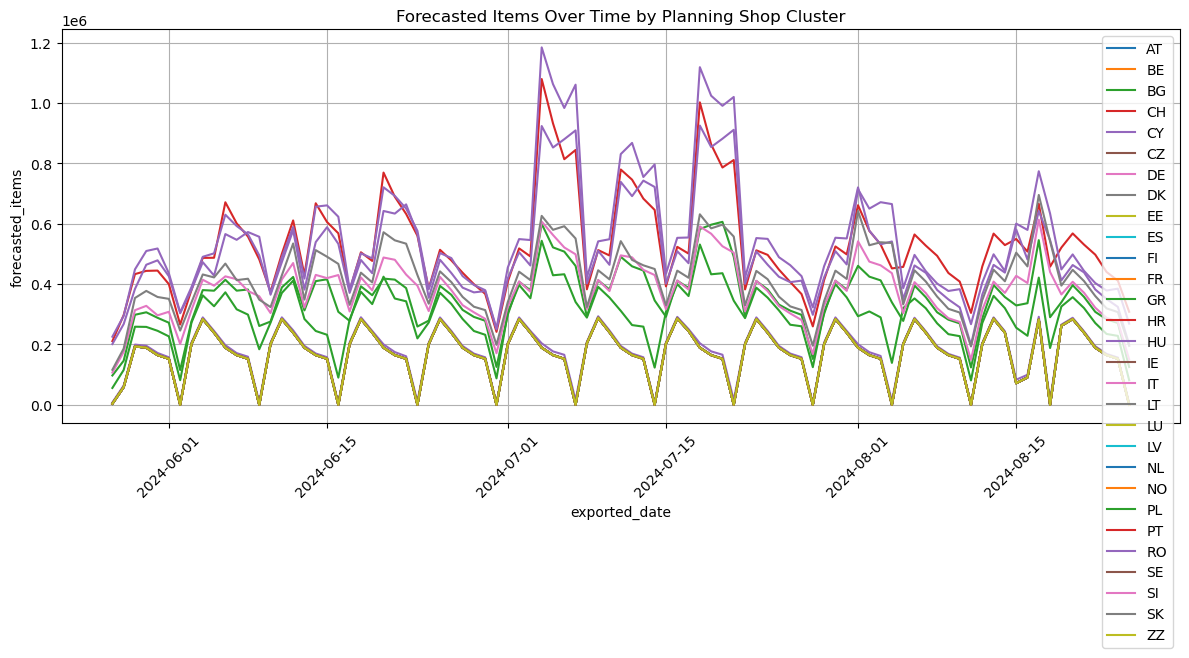

In [153]:
plt.figure(figsize=(12, 6))
for cluster in df_reshaped ['planning_shop_cluster'].unique():
    cluster_data = df_reshaped [df_reshaped['planning_shop_cluster'] == cluster]
    plt.plot (cluster_data['exported_at'], cluster_data['forecasted_items'], label =cluster)
plt.title('Forecasted Items Over Time by Planning Shop Cluster')
plt.xlabel('exported_date')
plt.ylabel('forecasted_items')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.xticks (rotation = 45)
plt.tight_layout()
plt.show()

In [154]:
spike_data = df_reshaped[df_reshaped ['is_spike']]

In [157]:
print (spike_data)

     planning_shop_cluster exported_at  forecasted_items  is_spike
303                     HR  2024-06-06            670893      True
304                     HU  2024-06-06            565617      True
314                     RO  2024-06-06            629725      True
332                     HR  2024-06-07            601039      True
343                     RO  2024-06-07            592235      True
...                    ...         ...               ...       ...
2402                    RO  2024-08-17            642131      True
2404                    SI  2024-08-17            613363      True
2405                    SK  2024-08-17            695203      True
2421                    HU  2024-08-18            633648      True
2478                    HR  2024-08-20            567729      True

[114 rows x 4 columns]


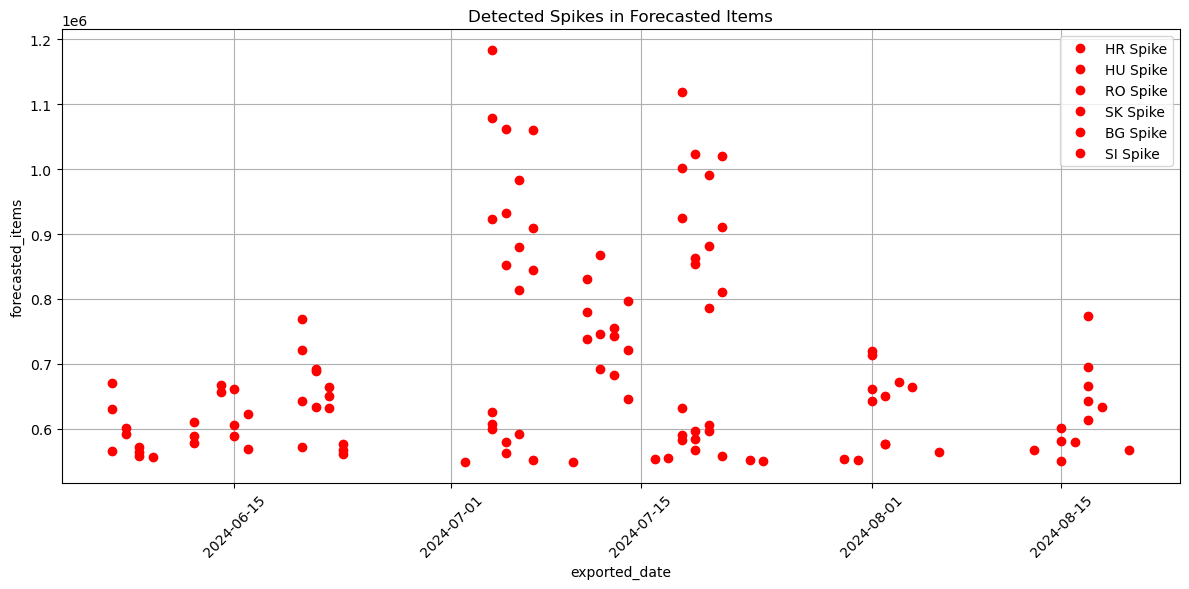

In [159]:
plt.figure(figsize=(12, 6))
for cluster in spike_data ['planning_shop_cluster'].unique():
    cluster_spike_data = spike_data [spike_data['planning_shop_cluster'] == cluster]
    plt.plot (cluster_spike_data['exported_at'], cluster_spike_data['forecasted_items'], 'ro', label=f'{cluster} Spike')
plt.title('Detected Spikes in Forecasted Items')
plt.xlabel('exported_date')
plt.ylabel('forecasted_items')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.xticks (rotation = 45)
plt.tight_layout()
plt.show()

In [161]:
# To check number of spike for each cluster using groupby
spike_counts = spike_data.groupby('planning_shop_cluster')['is_spike'].sum()


In [163]:
print(spike_counts)

planning_shop_cluster
BG     4
HR    30
HU    29
RO    35
SI     5
SK    11
Name: is_spike, dtype: int64


In [165]:
spikes_by_date = spike_data.groupby('exported_at')['is_spike'].sum()

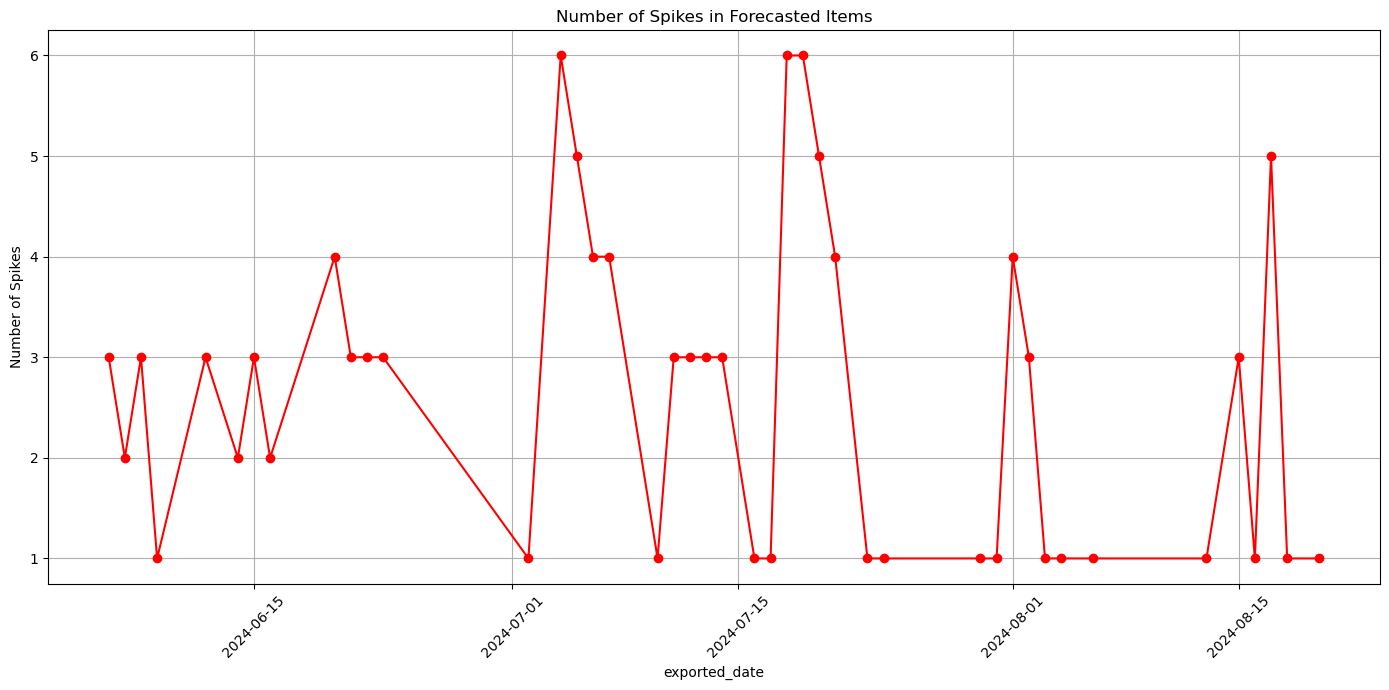

In [167]:
plt.figure(figsize=(14, 7))
plt.plot (spikes_by_date.index, spikes_by_date.values, marker='o', linestyle='-', color='r')
plt.title('Number of Spikes in Forecasted Items')
plt.xlabel('exported_date')
plt.ylabel('Number of Spikes')
plt.xticks (rotation = 45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [169]:
print(spikes_by_date)

exported_at
2024-06-06    3
2024-06-07    2
2024-06-08    3
2024-06-09    1
2024-06-12    3
2024-06-14    2
2024-06-15    3
2024-06-16    2
2024-06-20    4
2024-06-21    3
2024-06-22    3
2024-06-23    3
2024-07-02    1
2024-07-04    6
2024-07-05    5
2024-07-06    4
2024-07-07    4
2024-07-10    1
2024-07-11    3
2024-07-12    3
2024-07-13    3
2024-07-14    3
2024-07-16    1
2024-07-17    1
2024-07-18    6
2024-07-19    6
2024-07-20    5
2024-07-21    4
2024-07-23    1
2024-07-24    1
2024-07-30    1
2024-07-31    1
2024-08-01    4
2024-08-02    3
2024-08-03    1
2024-08-04    1
2024-08-06    1
2024-08-13    1
2024-08-15    3
2024-08-16    1
2024-08-17    5
2024-08-18    1
2024-08-20    1
Name: is_spike, dtype: int64


In [171]:
# Reset index to convert Series to DataFrame
spikes_by_date = spikes_by_date.reset_index()

# Now you can use pivot_table()
spikes_by_date_pivot = spikes_by_date.pivot_table(
    index='exported_at',
    values='is_spike',
    aggfunc='sum'
)



In [173]:
print(spikes_by_date_pivot.head())

             is_spike
exported_at          
2024-06-06          3
2024-06-07          2
2024-06-08          3
2024-06-09          1
2024-06-12          3
